In [1]:
import sys
sys.path.append('../')
import os
from smodels.theory.exceptions import SModelSTheoryError as SModelSError
from smodels.tools.smodelsLogging import logger
from smodels.experiment.databaseObj import Database
from smodels.experiment.txnameObj import TxName,TxNameData
from smodels.experiment.expSMS import ExpSMS
from smodels.experiment.infoObj import Info
from smodels.experiment.defaultFinalStates import finalStates
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
# logger.setLevel('DEBUG')

In [2]:
db = Database(os.path.abspath('../test/database'))
print(db)

Database version: unittest220
------------------------------
15 experimental results: 8 CMS, 7 ATLAS, 7 @ 8 TeV, 8 @ 13 TeV
124 datasets, 550 txnames.



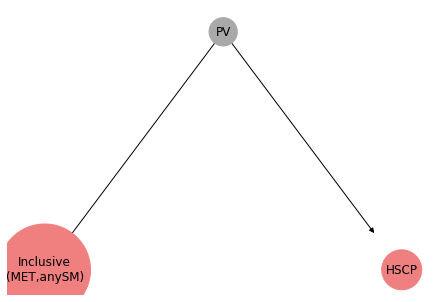

*


In [3]:
exp = db.getExpResults(analysisIDs='CMS-PAS-EXO-16-036', txnames='THSCPM2')[0]
tx = exp.getTxNames()[0]
for sms in tx.smsMap:
    sms.draw()
    print(sms.canonName)

In [4]:
elA = '(PV > gluino(1),sta_1), (gluino(1) > u,u~,N2(3)), (N2(3) > W-,sta_1~(4)), (sta_1~(4) > W+,N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
elA = ExpSMS.from_string(elA,model=model)

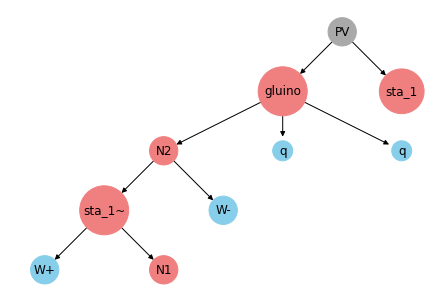

[PV, gluino, N2, sta_1~, sta_1, q, q, W-, W+, N1]
[(PV, gluino), (PV, sta_1), (gluino, N2), (gluino, q), (gluino, q), (N2, sta_1~), (N2, W-), (sta_1~, W+), (sta_1~, N1)]


In [5]:
elA.draw()
print(elA.nodes)
print(elA.edges)

In [6]:
tx.hasSMSas(elA)

(PV > Inclusive(1),sta_1), (Inclusive(1) > MET,anySM)

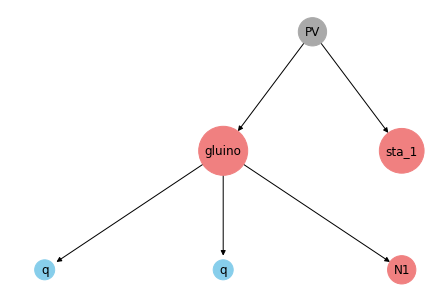

In [7]:
elB = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N1)'
elB = ExpSMS.from_string(elB,model=model)
elB.draw()

(PV > Inclusive(1),sta_1), (Inclusive(1) > MET,anySM)


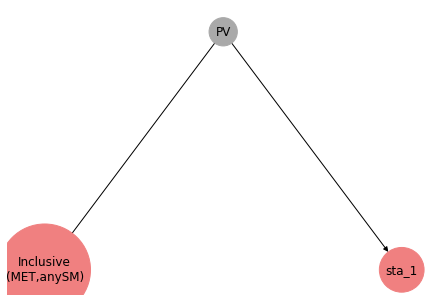

[PV, Inclusive, sta_1]
[(PV, Inclusive), (PV, sta_1)]


In [8]:
matchedEl = tx.hasSMSas(elB)
print(matchedEl)
matchedEl.draw()
print(matchedEl.nodes)
print(matchedEl.edges)

In [9]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > Z, N1)'
el = ExpSMS.from_string(elA,model=model)
tx.hasSMSas(el)

(PV > Inclusive(1),sta_1), (Inclusive(1) > MET,anySM)

In [10]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > W-, sta_1)'
el = ExpSMS.from_string(elA,model=model)
tx.hasSMSas(el)

False

In [11]:
elA = '(PV > sta_1,sta_1)'
el = ExpSMS.from_string(elA,model=model)
tx.hasSMSas(el)

False

### Check inclusive DT result:

In [12]:
db = Database(os.path.abspath('../test/database_extra'))
print(db)

Database version: unittest220extra
-----------------------------------
8 experimental results: 4 CMS, 4 ATLAS, 2 @ 8 TeV, 6 @ 13 TeV
89 datasets, 147 txnames.



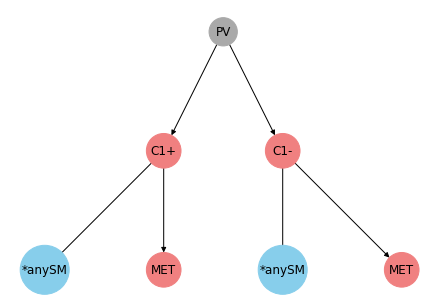

*
[PV, C1+, C1-, *anySM, MET, *anySM, MET]


In [13]:
exp = db.getExpResults(analysisIDs='CMS-EXO-19-010', txnames='TDTM1F')[0]
tx = exp.getTxNames()[0]
for el in tx.smsMap:
    el.draw()
    print(el.canonName)
    print(el.nodes)

(PV > C1-(1),C1+(2)), (C1-(1) > W-,N1), (C1+(2) > q,N1)
(PV > C1+(1),C1-(2)), (C1+(1) > *anySM,N1), (C1-(2) > *anySM,N1)


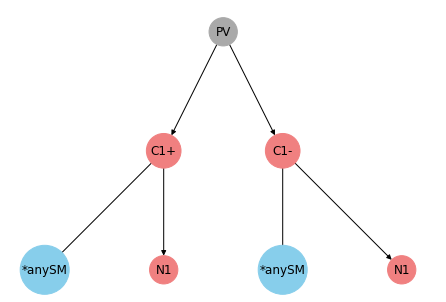

[PV, C1+, C1-, *anySM, N1, *anySM, N1]
[(PV, C1+), (PV, C1-), (C1+, *anySM), (C1+, N1), (C1-, *anySM), (C1-, N1)]


In [14]:
elA = '(PV > C1-(1),C1+(2)), (C1+(2) > u,N1), (C1-(1) > W-,N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1*GeV)
elA = ExpSMS.from_string(elA,model=model)
print(elA)

matchedEl = tx.hasSMSas(elA)
print(matchedEl)
matchedEl.draw()
print(matchedEl.nodes)
print(matchedEl.edges)

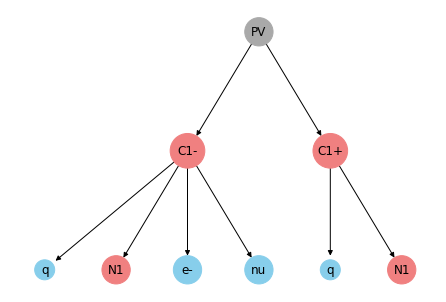

(PV > C1+(1),C1-(2)), (C1+(1) > *anySM,N1), (C1-(2) > *anySM,N1)


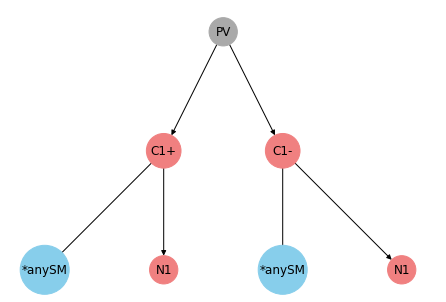

[PV, C1+, C1-, *anySM, N1, *anySM, N1]
[(PV, C1+), (PV, C1-), (C1+, *anySM), (C1+, N1), (C1-, *anySM), (C1-, N1)]


In [15]:
elA = '(PV > C1-(1),C1+(2)), (C1+(2) > u,N1), (C1-(1) > q,N1,e-,nu)'
elA = ExpSMS.from_string(elA,model=model)
elA.draw()

matchedEl = tx.hasSMSas(elA)
print(matchedEl)
matchedEl.draw()
print(matchedEl.nodes)
print(matchedEl.edges)

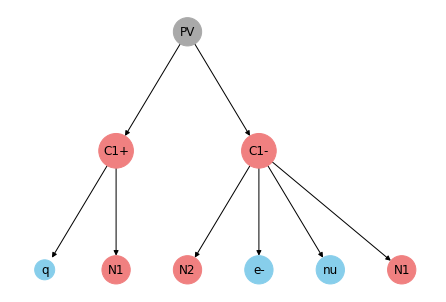

False


In [16]:
elA = '(PV > C1+(1),C1-(2)), (C1+(1) > u,N1), (C1-(2) > N2,e-,nu,N1)'
elA = ExpSMS.from_string(elA,model=model)
elA.draw()

matchedEl = tx.hasSMSas(elA)
print(matchedEl)